In [ ]:
!pip install mtcnn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
img = cv.imread("/content/drive/MyDrive/dataset/vijay/v6.jpeg")
# opencv BGR channel format and plt reads images as RGB channel format

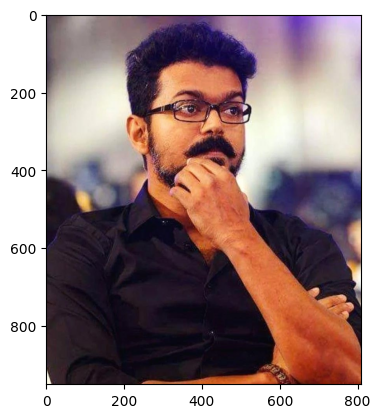

In [ ]:

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB

In [ ]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

1/1 [==============================] - 0s 167ms/step


In [ ]:
results

[{'box': [262, 123, 263, 364],
  'confidence': 0.9997992515563965,
  'keypoints': {'left_eye': (368, 239),
   'right_eye': (483, 253),
   'nose': (438, 280),
   'mouth_left': (361, 367),
   'mouth_right': (466, 378)}}]

In [ ]:
x,y,w,h = results[0]['box']

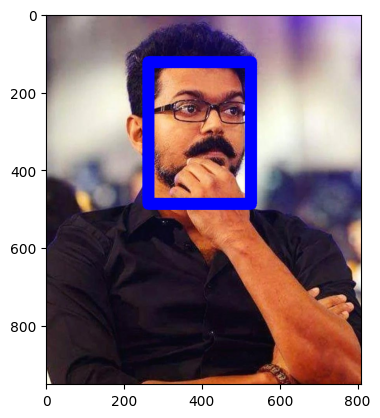

In [ ]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img)

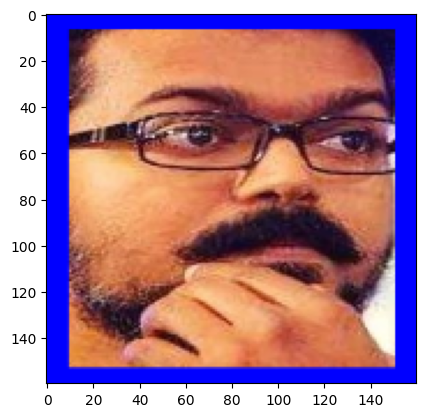

In [ ]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

In [ ]:
my_face

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

In [ ]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [ ]:
faceloading = FACELOADING("/content/drive/MyDrive/dataset")
X, Y = faceloading.load_classes()

1/1 [==============================] - 0s 44ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 50ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 33ms/step
Loaded successfully: 8
1/1 [==============================] - 0s 31ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 39ms/step
Loaded successfully: 10


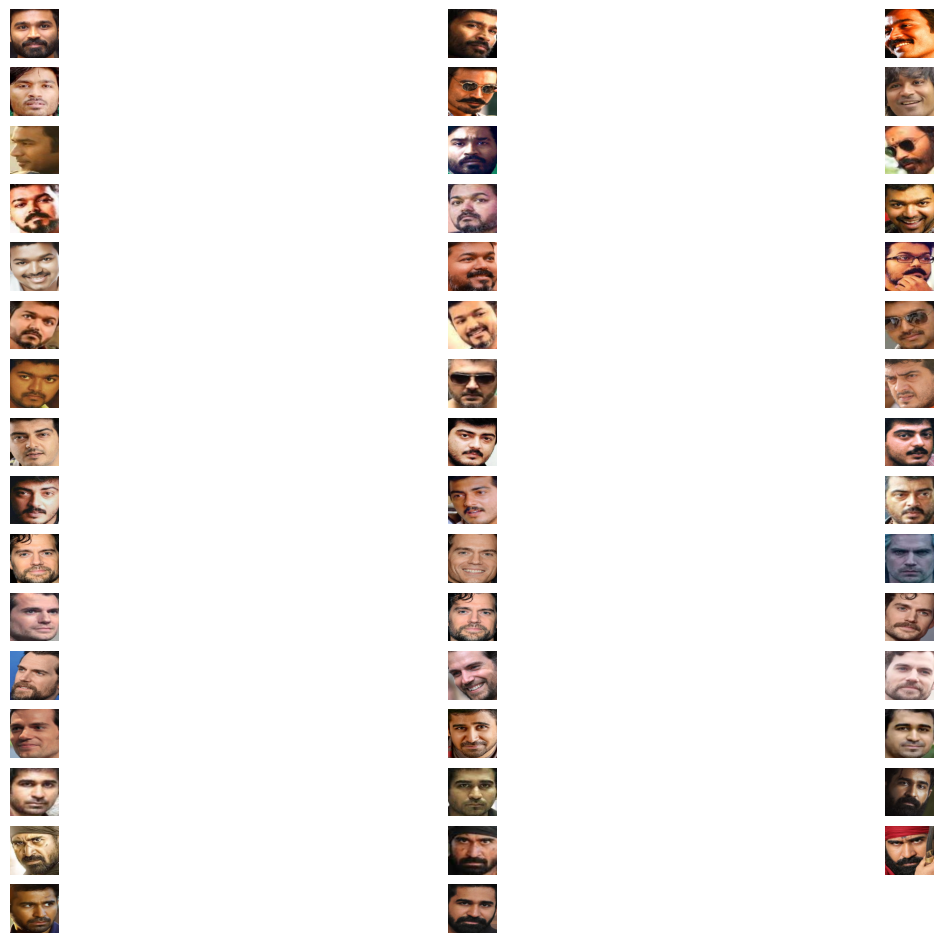

In [ ]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

In [ ]:
!pip install keras-facenet

In [ ]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [ ]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 207ms/step


In [ ]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

Text(0, 0.5, '2')

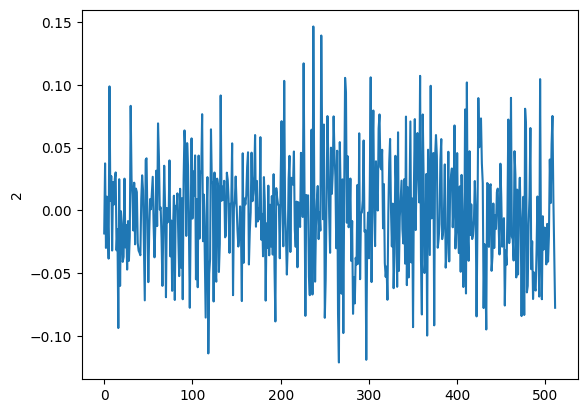

In [ ]:
plt.plot(EMBEDDED_X[0])
plt.ylabel(Y[0])

In [ ]:
y

123

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0

In [ ]:
accuracy_score(Y_test,ypreds_test)

1.0

In [ ]:
test_im = [test_im]
ypreds = model.predict(test_im)

array(['dhanush'], dtype='<U12')

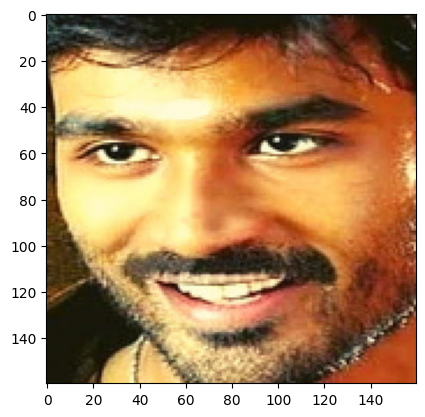

In [ ]:
plt.imshow(t_im)
encoder.inverse_transform(ypreds)

Epoch 1/10
2/2 [==============================] - 1s 194ms/step - loss: 1.6007 - accuracy: 0.2571 - val_loss: 1.5449 - val_accuracy: 0.7500
Epoch 2/10
2/2 [==============================] - 0s 34ms/step - loss: 1.5284 - accuracy: 0.8571 - val_loss: 1.5049 - val_accuracy: 0.8333
Epoch 3/10
2/2 [==============================] - 0s 34ms/step - loss: 1.4721 - accuracy: 0.8857 - val_loss: 1.4627 - val_accuracy: 0.8333
Epoch 4/10
2/2 [==============================] - 0s 32ms/step - loss: 1.4141 - accuracy: 0.9429 - val_loss: 1.4205 - val_accuracy: 0.5833
Epoch 5/10
2/2 [==============================] - 0s 32ms/step - loss: 1.3526 - accuracy: 0.9429 - val_loss: 1.3736 - val_accuracy: 0.5833
Epoch 6/10
2/2 [==============================] - 0s 31ms/step - loss: 1.2870 - accuracy: 0.9714 - val_loss: 1.3123 - val_accuracy: 0.6667
Epoch 7/10
2/2 [==============================] - 0s 32ms/step - loss: 1.2166 - accuracy: 0.9714 - val_loss: 1.2353 - val_accuracy: 0.8333
Epoch 8/10
2/2 [==========

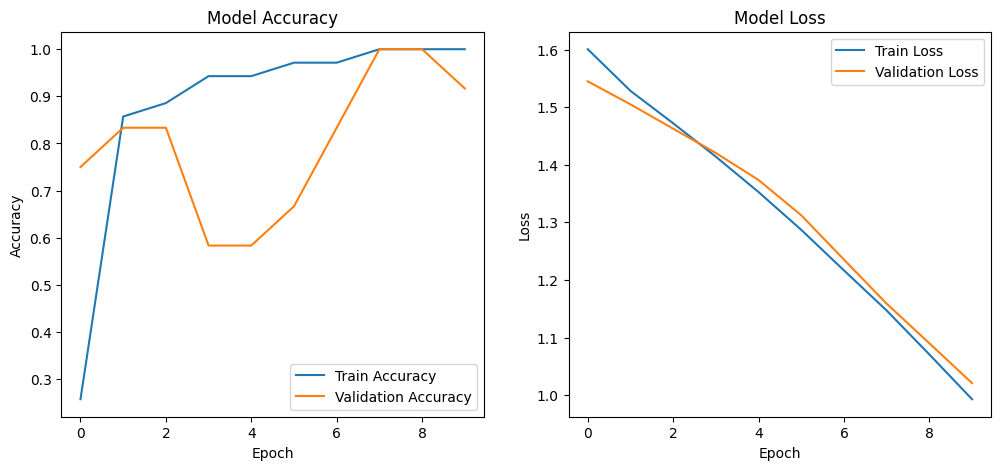

In [ ]:

history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
